In [88]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [89]:
# import the data
df = pd.read_csv('credit_card_approval.csv')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3924 non-null   int64  
 1   Gender      3924 non-null   object 
 2   Car         3924 non-null   object 
 3   Property    3924 non-null   object 
 4   Children    3924 non-null   object 
 5   Income      3924 non-null   float64
 6   Education   3924 non-null   object 
 7   Family      3924 non-null   object 
 8   HouseType   3924 non-null   object 
 9   Birth       3924 non-null   int64  
 10  Workdays    3924 non-null   int64  
 11  WorkPhone   3924 non-null   int64  
 12  Phone       3924 non-null   int64  
 13  Email       3924 non-null   int64  
 14  Job         3924 non-null   object 
 15  WorkMonths  3924 non-null   int64  
 16  Status      3924 non-null   object 
 17  Risk        3924 non-null   int64  
dtypes: float64(1), int64(8), object(9)
memory usage: 2.6 MB


In [90]:
df.head()

,ID,Gender,Car,Property,Children,Income,Education,Family,HouseType,Birth,Workdays,WorkPhone,Phone,Email,Job,WorkMonths,Status,Risk
0,5113255,F,Y,Y,No children,247500.0,Secondary / secondary special,Single / not married,With parents,11770,285,0,0,0,Sales staff,2,paid off that month,0
1,5125882,F,Y,Y,2+ children,180000.0,Higher education,Civil marriage,House / apartment,11542,1169,0,0,1,Sales staff,2,paid off that month,0
2,5023150,M,N,Y,1 children,315000.0,Higher education,Married,House / apartment,11400,1513,0,0,0,Managers,16,paid off that month,0
3,5125310,M,N,Y,2+ children,157500.0,Secondary / secondary special,Married,House / apartment,14035,2875,0,0,0,Laborers,39,1-29 days past due,0
4,5048231,F,N,N,No children,90000.0,Secondary / secondary special,Separated,House / apartment,18764,9866,0,0,0,Laborers,25,paid off that month,0


In [91]:
# to reduce the memory_usage 
# df['ID'].nunique()
# df.duplicated().sum()

# data conversion
df = df.astype({i:'category' for i in df.select_dtypes(include='object').columns})
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          3924 non-null   int64   
 1   Gender      3924 non-null   category
 2   Car         3924 non-null   category
 3   Property    3924 non-null   category
 4   Children    3924 non-null   category
 5   Income      3924 non-null   float64 
 6   Education   3924 non-null   category
 7   Family      3924 non-null   category
 8   HouseType   3924 non-null   category
 9   Birth       3924 non-null   int64   
 10  Workdays    3924 non-null   int64   
 11  WorkPhone   3924 non-null   int64   
 12  Phone       3924 non-null   int64   
 13  Email       3924 non-null   int64   
 14  Job         3924 non-null   category
 15  WorkMonths  3924 non-null   int64   
 16  Status      3924 non-null   category
 17  Risk        3924 non-null   int64   
dtypes: category(9), float64(1), int64(8)
memory usag

In [92]:
# data cleaning
# Missing values 
# Detection
df.isnull().sum()

# Treatment
# df.fillna()

ID            0
Gender        0
Car           0
Property      0
Children      0
Income        0
Education     0
Family        0
HouseType     0
Birth         0
Workdays      0
WorkPhone     0
Phone         0
Email         0
Job           0
WorkMonths    0
Status        0
Risk          0
dtype: int64

In [93]:
# duplicates
df.duplicated().sum()

0

<Axes: >

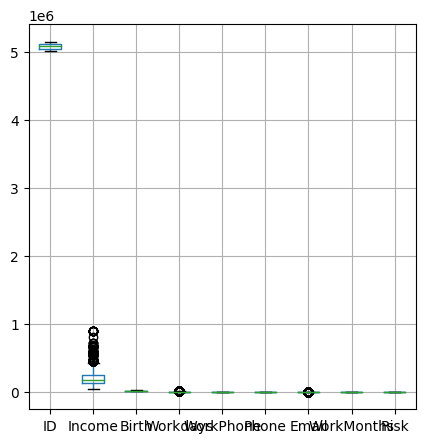

In [94]:
# outliers
# plotting: box-plot
plt.figure(figsize=(5,5))
df.boxplot()
# min, max, q1, q2, q3

In [95]:
# find out which method:  iqr method 
# formula: iqr = q3-q1
df.describe()

,ID,Income,Birth,Workdays,WorkPhone,Phone,Email,WorkMonths,Risk
count,3.924000e+03,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000
mean,5.084947e+06,201220.329128,15146.346330,2407.025994,0.302752,0.331549,0.104230,19.582824,0.500000
std,4.249291e+04,111702.480252,3400.773789,2242.634856,0.459508,0.470830,0.305598,14.061752,0.500064
min,5.008822e+06,36000.000000,7757.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.048273e+06,126000.000000,12330.000000,863.000000,0.000000,0.000000,0.000000,8.000000,0.000000
50%,5.089784e+06,180000.000000,15212.500000,1651.000000,0.000000,0.000000,0.000000,17.000000,0.500000
75%,5.118541e+06,247500.000000,17995.000000,3350.000000,1.000000,1.000000,0.000000,30.000000,1.000000
max,5.150478e+06,900000.000000,24449.000000,14887.000000,1.000000,1.000000,1.000000,60.000000,1.000000


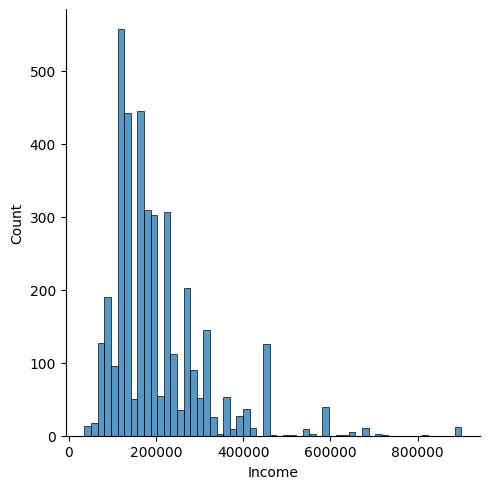

In [96]:
sns.displot(df['Income'])

In [97]:
# Treatment
# log transform
# adjusted_q1 = q1 - 1.5*iqr


In [98]:
# !pip install desc-stats
from desc_stats import desc_stats
num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num)
desc_stats(df, num) # list of features
# desc_stats(df,'Income') # single feature
# desc_stats(df, ['Income', 'Workdays'])

['ID', 'Income', 'Birth', 'Workdays', 'WorkPhone', 'Phone', 'Email', 'WorkMonths', 'Risk']


,ID,Income,Birth,Workdays,WorkPhone,Phone,Email,WorkMonths,Risk
Mean,5084946.994903,201220.329128,15146.34633,2407.025994,0.302752,0.331549,0.10423,19.582824,0.5
Median,5089784.0,180000.0,15212.5,1651.0,0.0,0.0,0.0,17.0,0.5
Mode,5085886.0,135000.0,20103.0,555.0,0.0,0.0,0.0,3.0,0.0
Variance,1805647575.604358,12477444094.448809,11565262.365623,5029411.095934,0.211147,0.221681,0.09339,197.732878,0.250064
Std,42492.912063,111702.480252,3400.773789,2242.634856,0.459508,0.47083,0.305598,14.061752,0.500064
Coef_Var,0.008357,0.555125,0.224528,0.931704,1.517767,1.42009,2.931949,0.718066,1.000127
Min,5008822.0,36000.0,7757.0,17.0,0.0,0.0,0.0,0.0,0.0
Max,5150478.0,900000.0,24449.0,14887.0,1.0,1.0,1.0,60.0,1.0
Range,141656.0,864000.0,16692.0,14870.0,1.0,1.0,1.0,60.0,1.0
Q1,5048273.25,126000.0,12330.0,863.0,0.0,0.0,0.0,8.0,0.0


In [99]:
# uni-variate analysis
# bi-variate analysis
# multi-variate analysis

In [100]:
# data preprocessing
# encoding
# !pip install scikit-learn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# find the variable having respective class such as binary, multi
binary_features = [i for i in df.select_dtypes(include=['object', 'category']).columns if df[i].nunique() == 2]
print("binary_features",binary_features)

multi_class_features = [i for i in df.select_dtypes(include=['object', 'category']).columns if df[i].nunique() > 2 and i not in binary_features]
print("multi_class_features:",multi_class_features)

binary_features ['Gender', 'Car', 'Property']
multi_class_features: ['Children', 'Education', 'Family', 'HouseType', 'Job', 'Status']


In [101]:
# ===== weightage encoding ====== #
print([(i,df[i].value_counts().to_dict()) for i in binary_features])
_binary = [(i, dict([(y,x) for x,y in enumerate(df[i].value_counts().index.to_list()[::-1])])) for i in binary_features]
print(_binary)

for index, values in _binary:
    df[index].replace(values, inplace=True)
    # print(index, values)

# ===== multi class encoding ==== #
oe = OrdinalEncoder()
df[multi_class_features] = oe.fit_transform(df[multi_class_features])

[('Gender', {'F': 2190, 'M': 1734}), ('Car', {'N': 2168, 'Y': 1756}), ('Property', {'Y': 2567, 'N': 1357})]
[('Gender', {'M': 0, 'F': 1}), ('Car', {'Y': 0, 'N': 1}), ('Property', {'N': 0, 'Y': 1})]


In [102]:
df.head()

,ID,Gender,Car,Property,Children,Income,Education,Family,HouseType,Birth,Workdays,WorkPhone,Phone,Email,Job,WorkMonths,Status,Risk
0,5113255,1,0,1,2.0,247500.0,4.0,3.0,5.0,11770,285,0,0,0,14.0,2,7.0,0
1,5125882,1,0,1,1.0,180000.0,1.0,0.0,1.0,11542,1169,0,0,1,14.0,2,7.0,0
2,5023150,0,1,1,0.0,315000.0,1.0,1.0,1.0,11400,1513,0,0,0,10.0,16,7.0,0
3,5125310,0,1,1,1.0,157500.0,4.0,1.0,1.0,14035,2875,0,0,0,8.0,39,0.0,0
4,5048231,1,1,0,2.0,90000.0,4.0,2.0,1.0,18764,9866,0,0,0,8.0,25,7.0,0


In [103]:
# scaling-down the features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df.iloc[:,:-1] = ss.fit_transform(df.iloc[:,:-1])

In [106]:
df.head()

,ID,Gender,Car,Property,Children,Income,Education,Family,HouseType,Birth,Workdays,WorkPhone,Phone,Email,Job,WorkMonths,Status,Risk
0,0.666267,0.889821,-1.111136,0.727071,0.744497,0.414365,0.754297,1.736439,3.757298,-0.992944,-0.946341,-0.658947,-0.704271,-0.341114,1.480837,-1.250560,1.059138,0
1,0.963460,0.889821,-1.111136,0.727071,-0.397569,-0.189996,-1.404085,-1.532609,-0.306829,-1.059996,-0.552111,-0.658947,-0.704271,2.931575,1.480837,-1.250560,1.059138,0
2,-1.454475,-1.123822,0.899979,0.727071,-1.539635,1.018726,-1.404085,-0.442927,-0.306829,-1.101756,-0.398701,-0.658947,-0.704271,-0.341114,0.547674,-0.254825,1.059138,0
3,0.949997,-1.123822,0.899979,0.727071,-0.397569,-0.391450,0.754297,-0.442927,-0.306829,-0.326834,0.208698,-0.658947,-0.704271,-0.341114,0.081093,1.381026,-1.698436,0
4,-0.864160,0.889821,0.899979,-1.375381,0.744497,-0.995811,0.754297,0.646756,-0.306829,1.063909,3.326411,-0.658947,-0.704271,-0.341114,0.081093,0.385291,1.059138,0


In [107]:
# split the data: 70:30
from sklearn.model_selection import train_test_split

x = df.drop('Risk', axis=1)
y = df['Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [108]:
# logistic regression: base model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(accuracy_score(y_test, predictions))

0.6129032258064516


In [109]:
confusion_matrix(y_test, predictions)

array([[358, 237],
       [219, 364]], dtype=int64)

In [ ]:
# imrove the accuracy